<a href="https://colab.research.google.com/github/aolivieri/colon/blob/master/colon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/aolivieri/ml-datasets.git

Cloning into 'ml-datasets'...
remote: Enumerating objects: 19552, done.
remote: Total 19552 (delta 0), reused 0 (delta 0), pack-reused 19552
Receiving objects: 100% (19552/19552), 1.06 GiB | 33.00 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (20019/20019), done.


In [3]:
!ls ./ml-datasets/colon_image_sets

test_set  training_set


In [4]:
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
tf.__version__

'2.2.0'

In [0]:
import tensorflow.keras.backend as K

In [0]:
# K.clear_session()

In [5]:
# Part 1 - Data Preprocessing

# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('./ml-datasets/colon_image_sets/training_set',
                                                 target_size = (224, 224),
                                                 class_mode = 'binary')

# Creating the Test set
test_set = test_datagen.flow_from_directory('./ml-datasets/colon_image_sets/test_set',
                                            target_size = (224, 224),
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
a, b = training_set.next()
a.shape, b.shape

((32, 224, 224, 3), (32,))

In [0]:
from PIL import Image
import numpy as np

0.0


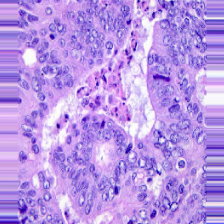

In [6]:
print(b[0])
Image.fromarray(np.uint8(255 * a[0]))

1.0


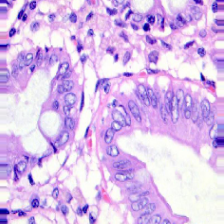

In [7]:
print(b[2])
Image.fromarray(np.uint8(255 * a[2]))

In [8]:
# Transfer Learning

from tensorflow.keras.models import *

pretrained_vgg16 = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
# Freeze all layers
for l in pretrained_vgg16.layers:
  l.trainable = False

global_avg_pool = tf.keras.layers.GlobalAveragePooling2D()(pretrained_vgg16.output)
fc1 = tf.keras.layers.Dense(512, activation='relu')(global_avg_pool)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)
output = tf.keras.layers.Dense(1, activation='sigmoid')(fc2)

model = Model(pretrained_vgg16.input, output)

58892288/58889256 [==============================] - 1s 0us/step


In [9]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# Training the CNN on the Training set and evaluating it on the Test set
hist = model.fit_generator(training_set,
                  steps_per_epoch = training_set.__len__(),
                  epochs = 5,
                  validation_data = test_set,
                  validation_steps = test_set.__len__())

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
250/250 [==============================] - 180s 719ms/step - loss: 0.0886 - accuracy: 0.9660 - val_loss: 0.0240 - val_accuracy: 0.9915
Epoch 2/5
250/250 [==============================] - 178s 712ms/step - loss: 0.0344 - accuracy: 0.9876 - val_loss: 0.0168 - val_accuracy: 0.9930
Epoch 3/5
250/250 [==============================] - 177s 710ms/step - loss: 0.0305 - accuracy: 0.9893 - val_loss: 0.0149 - val_accuracy: 0.9965
Epoch 4/5
250/250 [==============================] - 175s 701ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0123 - val_accuracy: 0.9955
Epoch 5/5
250/250 [==============================] - 175s 700ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0111 - val_accuracy: 0.9970


In [0]:
model.save('colon.h5')

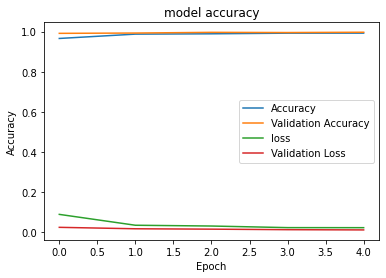

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

[[1.]]


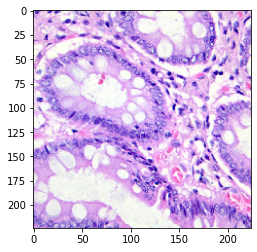

In [17]:
from keras.preprocessing import image
import numpy as np
#img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_aca/colonca4001.jpeg",target_size=(224,224))
img = image.load_img("./ml-datasets/colon_image_sets/test_set/colon_n/colonn4001.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

from tensorflow.keras.models import load_model
saved_model = load_model("colon.h5")
output = saved_model.predict(img)
print(output)